In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Better visualization defaults
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [4]:
# 2. LOAD DATASET
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alyelbadry/house-pricing-dataset")

print("Path to dataset files:", path)

df = pd.read_csv("train.csv")

print("Dataset Shape:", df.shape)
df.head()


100%|██████████| 796k/796k [00:00<00:00, 84.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/alyelbadry/house-pricing-dataset/versions/1
Dataset Shape: (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# 3. BASIC DATA INSPECTION
print("\n--- Dataset Info ---")
df.info()

print("\n--- Missing Values (Top 10) ---")
df.isnull().sum().sort_values(ascending=False).head(10)

print("\n--- Statistical Summary ---")
df.describe()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-nul

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.234303,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.766318,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# 4. SEPARATE NUMERICAL & CATEGORICAL COLUMNS
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

print("Numerical Columns:", len(num_cols))
print("Categorical Columns:", len(cat_cols))



Numerical Columns: 18
Categorical Columns: 3


In [7]:
# 5. HANDLE MISSING VALUES

# ---- Drop columns with too many missing values (>40%) ----
missing_ratio = df.isnull().mean()
drop_cols = missing_ratio[missing_ratio > 0.4].index
df.drop(columns=drop_cols, inplace=True)

print("Dropped Columns:", list(drop_cols))


Dropped Columns: []


In [8]:
for col in num_cols:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)


# ---- Impute Categorical Columns with Mode ----
for col in cat_cols:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)


print("\nMissing values after cleaning:")
print(df.isnull().sum().sum())


Missing values after cleaning:
0


/tmp/ipython-input-2923198731.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2923198731.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

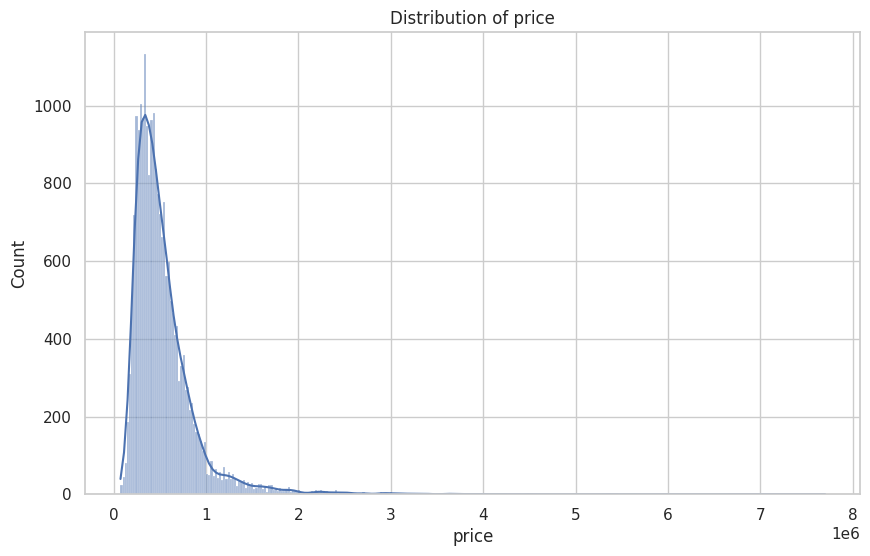

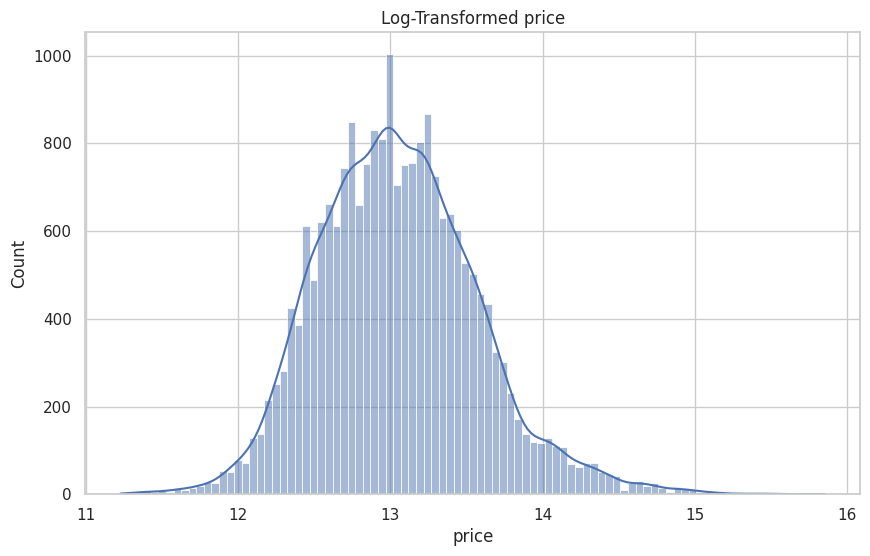

In [10]:
# 6. UNIVARIATE ANALYSIS (DISTRIBUTIONS)

# Target Variable Distribution
sns.histplot(df["price"], kde=True)
plt.title("Distribution of price")
plt.show()

# Log-transformed target (common in real projects)
sns.histplot(np.log1p(df["price"]), kde=True)
plt.title("Log-Transformed price")
plt.show()

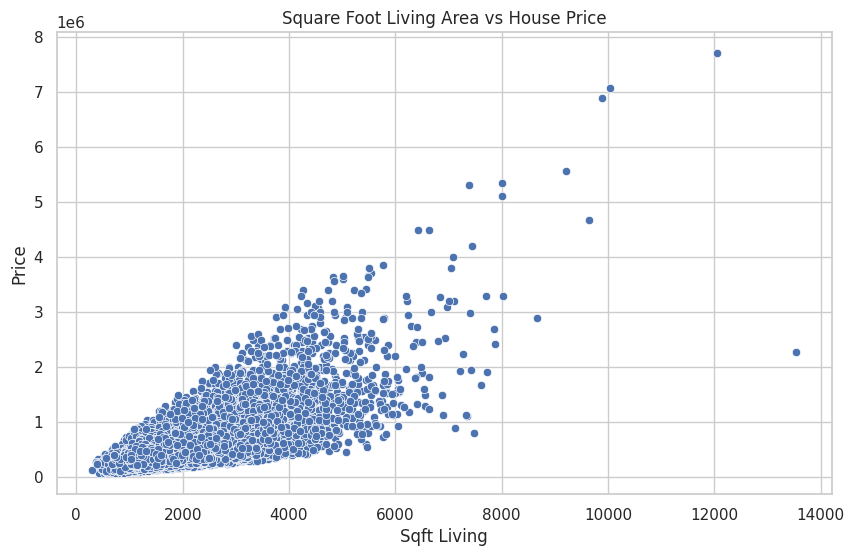

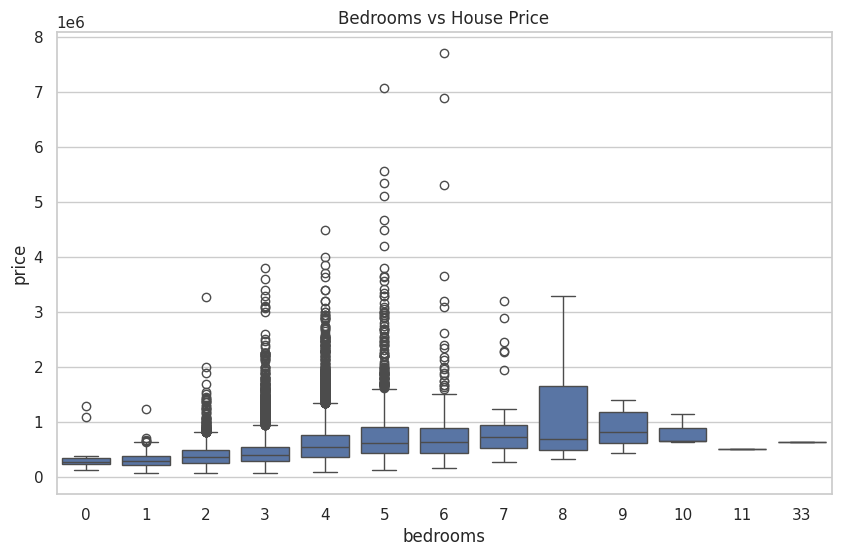

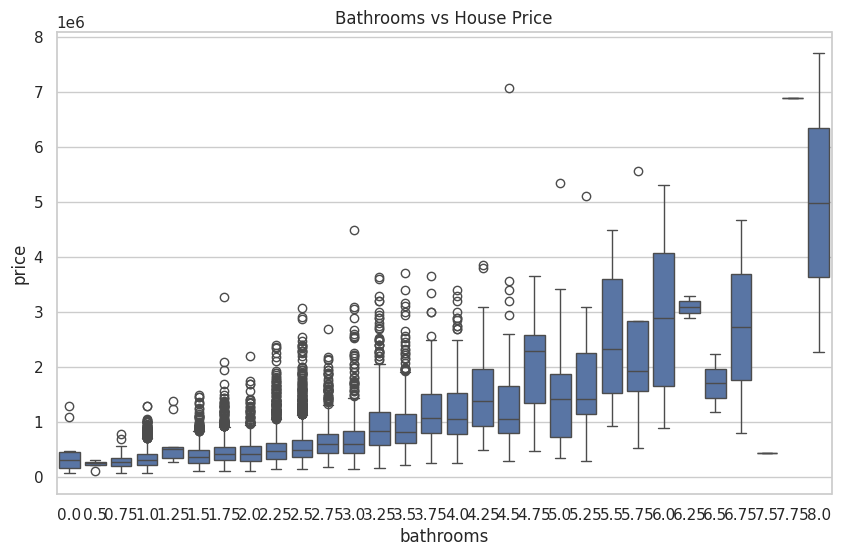

In [12]:
# 7. BIVARIATE ANALYSIS
# Numerical Feature vs Target (Living Area vs Price)
sns.scatterplot(x=df["sqft_living"], y=df["price"])
plt.title("Square Foot Living Area vs House Price")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.show()


# Bedrooms vs Price
sns.boxplot(x="bedrooms", y="price", data=df)
plt.title("Bedrooms vs House Price")
plt.show()


# Bathrooms vs Price
sns.boxplot(x="bathrooms", y="price", data=df)
plt.title("Bathrooms vs House Price")
plt.show()



Top Features Correlated with Price:
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
Name: price, dtype: float64


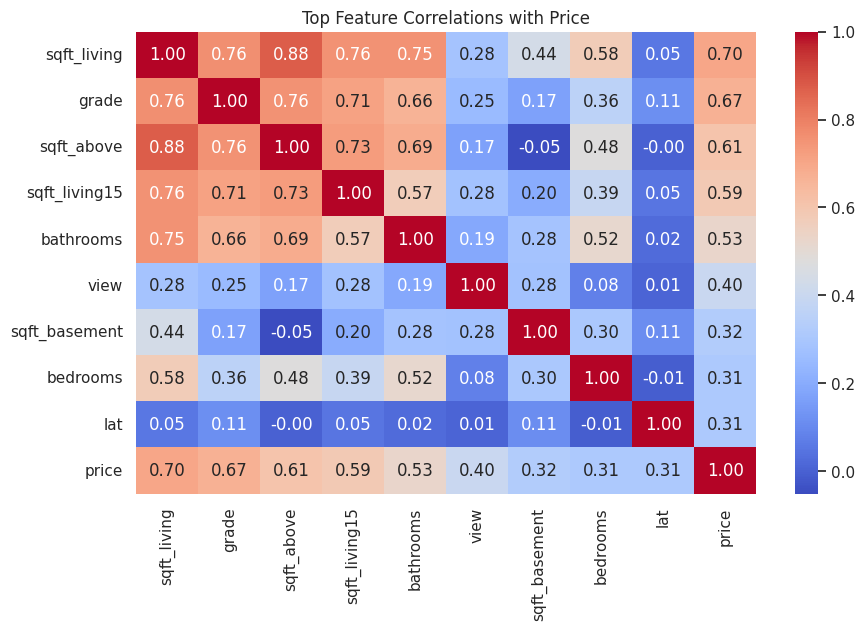

In [13]:
# Correlation matrix (numerical columns only)
corr = df.corr(numeric_only=True)

# Top correlated features with price
top_corr = corr["price"].sort_values(ascending=False)[1:10]

print("\nTop Features Correlated with Price:")
print(top_corr)


# Heatmap of top correlated features
top_features = top_corr.index.tolist() + ["price"]

sns.heatmap(
    df[top_features].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Top Feature Correlations with Price")
plt.show()


In [14]:
#9 Outlier Detection
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df["price"] < Q1 - 1.5 * IQR) |
    (df["price"] > Q3 + 1.5 * IQR)
]

print("Number of Outliers in Price:", outliers.shape[0])


Number of Outliers in Price: 1146


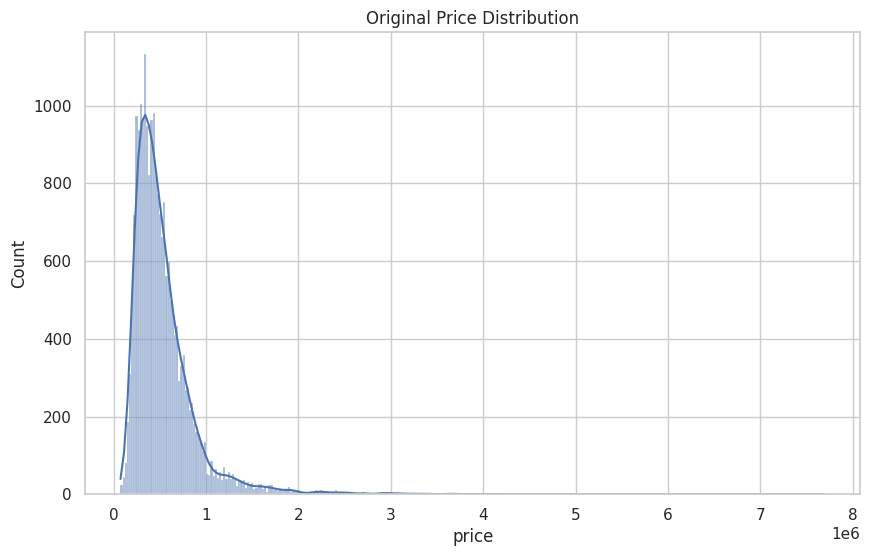

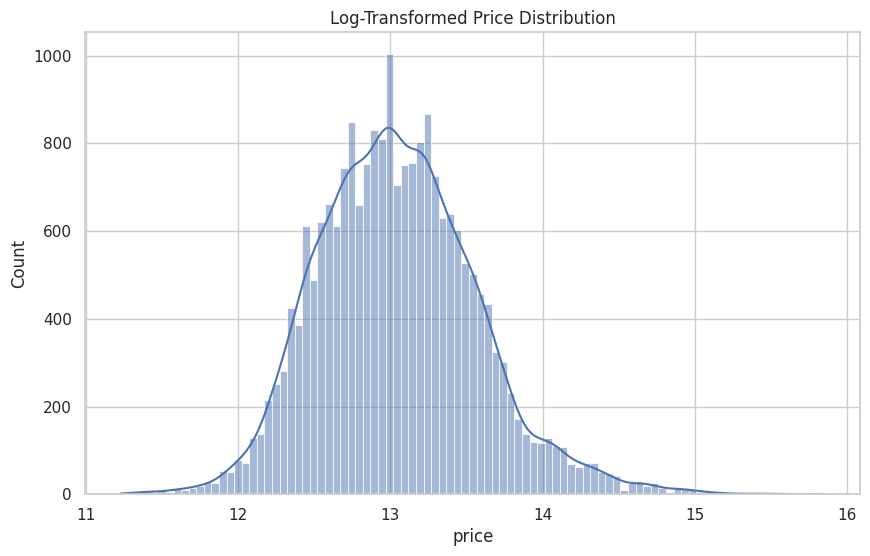

In [15]:
#10 Log Trasformation
sns.histplot(df["price"], kde=True)
plt.title("Original Price Distribution")
plt.show()

sns.histplot(np.log1p(df["price"]), kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()
